In [1]:
!pip install rudalle==1.1.3
!pip install ruclip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 5.7 MB/s 
     |████████████████████████████████| 66 kB 4.0 MB/s 
     |████████████████████████████████| 4.4 MB 34.7 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 79 kB 9.4 MB/s 
     |████████████████████████████████| 1.7 MB 63.5 MB/s 
     |████████████████████████████████| 2.8 MB 41.1 MB/s 
     |████████████████████████████████| 60.3 MB 1.2 MB/s 
     |████████████████████████████████| 45 kB 2.2 MB/s 
     |████████████████████████████████| 58 kB 7.2 MB/s 
     |████████████████████████████████| 244 kB 69.4 MB/s 
     |████████████████████████████████| 798 kB 64.1 MB/s 
     |████████████████████████████████| 117 kB 75.2 MB/s 
     |████████████████████████████████| 529 kB 60.9 MB/s 
     |████████████████████████████████| 87 kB 8.6 MB/s 
     |████████████████████████████████| 3.3 M

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 595 kB/s 
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.11.0
    Uninstalling huggingface-hub-0.11.0:
      Successfully uninstalled huggingface-hub-0.11.0


In [2]:
import ruclip
from rudalle.pipelines import generate_images, show, super_resolution, cherry_pick_by_ruclip
from rudalle import get_rudalle_model, get_tokenizer, get_vae, get_realesrgan
from rudalle.utils import seed_everything
import torch

# prepare models:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
dalle = get_rudalle_model('Malevich', pretrained=True, fp16=True, device=device)
tokenizer = get_tokenizer()
vae = get_vae(dwt=True).to(device)

# pipeline utils:
realesrgan = get_realesrgan('x2', device=device)
clip, processor = ruclip.load('ruclip-vit-base-patch32-384', device=device)
clip_predictor = ruclip.Predictor(clip, processor, device, bs=8)

Downloading:   0%|          | 0.00/2.62G [00:00<?, ?B/s]

  0%|          | 0/398 [00:00<?, ?it/s]

◼️ Malevich is 1.3 billion params model from the family GPT3-like, that uses Russian language and text+image multi-modality.


Downloading:   0%|          | 0.00/224k [00:00<?, ?B/s]

tokenizer --> ready
Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


Downloading:   0%|          | 0.00/276M [00:00<?, ?B/s]

vae --> ready


Downloading:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

x2 --> ready


Downloading:   0%|          | 0.00/748k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/606M [00:00<?, ?B/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/rudalle/dalle/model.py:95: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dtype=torch.long, device=self.device) // self.image_tokens_per_dim


  0%|          | 0/1024 [00:00<?, ?it/s]

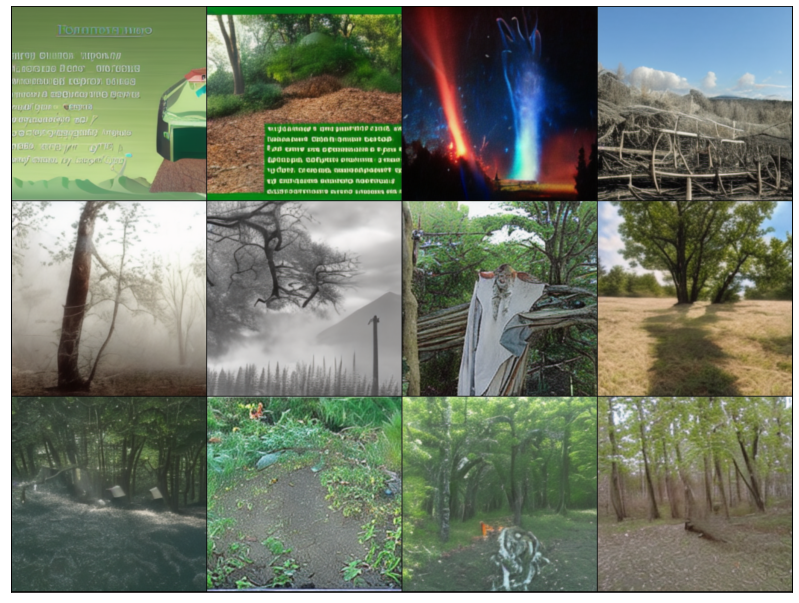

In [3]:
text = 'Старый дуб, весь преображенный, раскинувшись шатром сочной, темной зелени, млел, чуть колыхаясь в лучах вечернего солнца. Ни корявых пальцев, ни болячек, ни старого горя и недоверия — ничего не было видно. Сквозь столетнюю жесткую кору пробились без сучков сочные, молодые листья, так что верить нельзя было, что этот старик произвел их.'

seed_everything(42)
pil_images = []
scores = []
for top_k, top_p, images_num in [
    (2048, 0.995, 12),
]:
    _pil_images, _scores = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=images_num, bs=8, top_p=top_p)
    pil_images += _pil_images
    scores += _scores

show(pil_images, 4)

  0%|          | 0/1024 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/rudalle/dalle/model.py:95: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dtype=torch.long, device=self.device) // self.image_tokens_per_dim


  0%|          | 0/1024 [00:00<?, ?it/s]

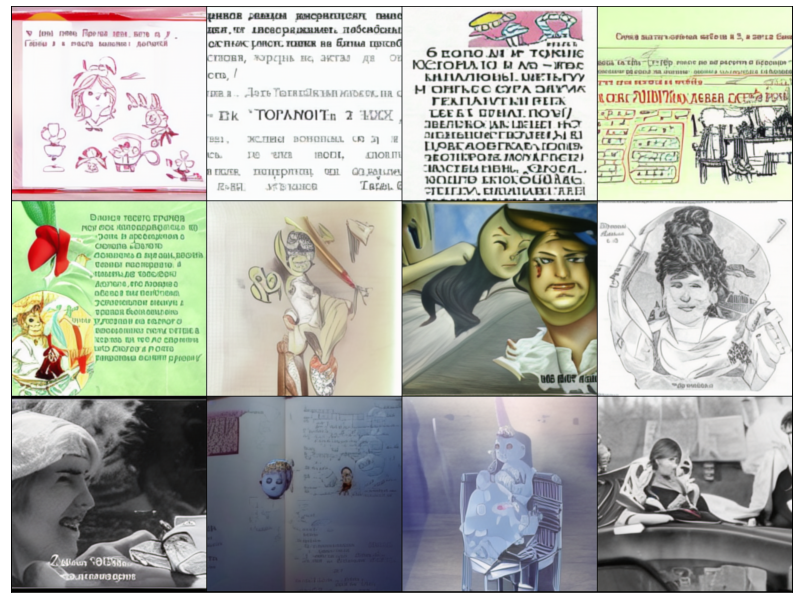

In [4]:
text = "Наташа ехала на первый большой бал в своей жизни. Она в этот день встала в восемь часов утра и целый день находилась в лихорадочной тревоге и деятельности. Все силы ее с самого утра были устремлены на то, чтоб они все: она, мама, Соня – были одеты как нельзя лучше. Соня и графиня поручились вполне ей. На графине должно было быть масака бархатное платье, на них двух белые дымковые платья на розовых шелковых чехлах, с розанами в корсаже. Волоса должны были быть причесаны a la grecque. Все существенное уже было сделано: ноги, руки, шея, уши были уже особенно старательно, по‑бальному, вымыты, надушены и напудрены; обуты уже были шелковые ажурные чулки и белые атласные башмаки с бантиками; прически были почти окончены. Соня кончала одеваться, графиня тоже; но Наташа, хлопотавшая за всех, отстала. Она еще сидела перед зеркалом в накинутом на худенькие плечи пеньюаре. Соня, уже одетая, стояла посреди комнаты и, нажимая до боли маленьким пальцем, прикалывала последнюю визжавшую под булавкой ленту."
seed_everything(42)
pil_images = []
scores = []
for top_k, top_p, images_num in [
    (2048, 0.995, 12),
]:
    _pil_images, _scores = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=images_num, bs=8, top_p=top_p)
    pil_images += _pil_images
    scores += _scores

show(pil_images, 4)

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

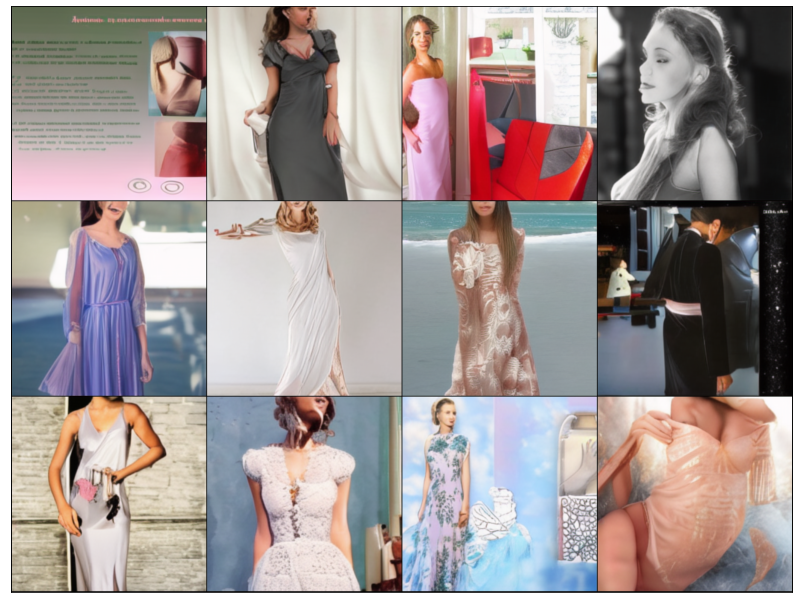

In [5]:
text = "На графине должно было быть масака бархатное платье, на них двух белые дымковые платья на розовых шелковых чехлах, с розанами в корсаже. Волоса должны были быть причесаны a la grecque. "
seed_everything(42)
pil_images = []
scores = []
for top_k, top_p, images_num in [
    (2048, 0.995, 12),
]:
    _pil_images, _scores = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=images_num, bs=8, top_p=top_p)
    pil_images += _pil_images
    scores += _scores

show(pil_images, 4)